# SI 370 - Lab 4 - Exploring data using Pandas
## Objectives:
* Continue getting comfortable with Pandas
* Practice exploration of data using filtering, sorting, and plotting

## Data files:
Download the moviedata.zip file from the Files/Datasets folder on Canvas and unzip the file so you wind up with the csv files in the same directory as this .ipynb file.


## Submission Instructions:
Please turn in this Jupyter notebook file (.ipynb format) on Canvas before you leave the classroom. Try to get through as much as you can.

## Note: you only need to complete the <font color="red">Q1, Q2, Q3, Q4, Q5 and Q6</font> cells for this lab but the other cells may be helpful

## Let's do some setup

In [4]:
# load a few libraries we'll need

%matplotlib inline
import pandas as pd
import random
import numpy as np
from random import sample
import matplotlib.pyplot as plt

## Load some data

In [5]:
# load up the tables we need

titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
# titles table contains a list of movie titles and release year

cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
# cast table contains the following columns 
# title = name of movie
# year = year of movie
# name = name of actor/actress
# type = actor or actress
# character = character name
# n = number in the credits (NaN when not available)

In [6]:
titles.head()

title  year
0           The Rising Son  1990
1  The Thousand Plane Raid  1969
2         Crucea de piatra  1993
3                  Country  2000
4               Gaiking II  2011

In [7]:
cast.head(20)

title  year  \
0                                      Closet Monster  2015   
1                                     Suuri illusioni  1985   
2                                 Battle of the Sexes  2017   
3                                Secret in Their Eyes  2015   
4                                          Steve Jobs  2015   
5                              Straight Outta Compton  2015   
6                              Straight Outta Compton  2015   
7                                      For Thy Love 2  2009   
8   Lapis, Ballpen at Diploma, a True to Life Journey  2014   
9                                        Desire (III)  2014   
10                            When the Man Went South  2014   
11                            Little Angel (Angelita)  2015   
12                                         Mixing Nia  1998   
13                                   The Replacements  2000   
14                               All Out Dysfunktion!  2016   
15                                               Gook  2017   
16                                    My Song for You  2010   
17                                    My Song for You  2010   
18                                       Hustle Beach  2017   
19                               Mariano Mison... NBI  1997   

                          name   type  \
0                     Buffy #1  actor   
1                       Homo $  actor   
2                      $hutter  actor   
3                      $hutter  actor   
4                      $hutter  actor   
5                      $hutter  actor   
6                      $hutter  actor   
7                 Bee Moe $lim  actor   
8    Jori ' Danilo' Jurado Jr.  actor   
9             Syaiful 'Ariffin  actor   
10          Taipaleti 'Atu'ake  actor   
11  Michael 'babeepower' Viera  actor   
12  Michael 'babeepower' Viera  actor   
13           Steven 'Bear'Boyd  actor   
14       Kirlew 'bliss' Vilbon  actor   
15       Kirlew 'bliss' Vilbon  actor   
16      George 'Bootsy' Thomas  actor   
17      George 'Bootsy' Thomas  actor   
18       Pete 'Boretta' Torres  actor   
19         Joseph 'Byron' Sese  actor   

                                  character     n  
0                                   Buffy 4   NaN  
1                                    Guests  22.0  
2                           Bobby Riggs Fan  10.0  
3                           2002 Dodger Fan   NaN  
4                   1988 Opera House Patron   NaN  
5                               Club Patron   NaN  
6                                   Dopeman   NaN  
7                                    Thug 1   NaN  
8                             Jaime (young)   9.0  
9    Actor Playing Eteocles from 'Antigone'   NaN  
10                   Two Palms - Ua'i Paame   8.0  
11                                    Chico   9.0  
12                                   Rapper   NaN  
13  Defensive Tackle - Washington Sentinels   NaN  
14                                    Bliss   NaN  
15                                    Bliss   NaN  
16                        Cooley's Customer  16.0  
17                        Celebration Guest  16.0  
18                                     Tony   NaN  
19                              Putik's Son  31.0

In [8]:
# some warm-up
# the number of cast entries
len(cast)

3634467

In [9]:
cast.sample(5)

title  year           name     type  \
3239598            Fairhaven  2012  Donna O'Brien  actress   
354966               Svitati  1999    Dino Cassio    actor   
477718            Fist Fight  2017   Corey Creque    actor   
359081   Bruce the Challenge  2017    Nik Catello    actor   
2812695  My Mother's Courage  1995  Hana Frejkov?  actress   

                   character     n  
3239598           Mrs. Drake   NaN  
354966         Bicycle Thief  25.0  
477718   High School Student   NaN  
359081             The knife   NaN  
2812695               Martha  12.0

## Let's do some basic analysis

In [10]:
# what are the two earliest movies?
titles.columns
titles.sort_values('year')[0:2] # fix this

title  year
177757          Miss Jerry  1894
215272  The Startled Lover  1898

In [11]:
# How many movies have the title "Hamlet"?
# remember to use the concept of "masks"
len(titles[titles.title == 'Hamlet'])

18

In [12]:
# List all of the "Treasure Island" movies from earliest to most recent
titles[titles.title == 'Treasure Island'].sort_values('year')

title  year
206027  Treasure Island  1918
51287   Treasure Island  1920
191050  Treasure Island  1934
96934   Treasure Island  1950
89534   Treasure Island  1972
111343  Treasure Island  1973
205397  Treasure Island  1985
179354  Treasure Island  1999

In [13]:
# Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".
cast[(cast.title == 'Sleuth') & (cast.year == 2007)].sort_values('n')

title  year                 name     type          character    n
316653   Sleuth  2007        Michael Caine    actor             Andrew  1.0
1254632  Sleuth  2007             Jude Law    actor               Milo  2.0
1751872  Sleuth  2007        Harold Pinter    actor        Man on T.V.  3.0
251883   Sleuth  2007      Kenneth Branagh    actor  Other Man on T.V.  NaN
362593   Sleuth  2007  Alec (II) Cawthorne    actor  Inspector Doppler  NaN
2635707  Sleuth  2007    Eve (II) Channing  actress    Marguerite Wyke  NaN
3244050  Sleuth  2007    Carmel O'Sullivan  actress             Maggie  NaN

In [14]:
# What are the ten most common movie names of all time?
titles.title.value_counts().head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Kismet                  11
Temptation              11
Othello                 11
Name: title, dtype: int64

# <font color='red'>Q1: List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.</font>

In [15]:
# your code goes here
cast[(cast.name == 'Cary Grant') & (cast.year >= 1940) & (cast.year < 1950) & (cast.n == 2)].sort_values('year')

title  year        name   type    character    n
845513  My Favorite Wife  1940  Cary Grant  actor   Nick Arden  2.0
845523    Penny Serenade  1941  Cary Grant  actor  Roger Adams  2.0

# <font color="red">Q2: Plot the number of "Hamlet" characters each decade</font>

In [16]:
# Plot the number of "Hamlet" characters each decade.
cast[()]

KeyError: ()

# <font color="red">Q3: What are the 10 most frequent roles that start with the word "Science"?</font>

In [ ]:
# What are the 10 most frequent roles that start with the word "Science"?
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

In [ ]:
# Plot the n-values of Cary Grant’s roles through his career.
cast[cast.name == 'Cary Grant'].sort_values('year').plot(x = 'year', y = 'n', kind = "scatter")

In [ ]:
# Plot the n-values of Nicolas Cage roles through his career.  Make this a one-liner
cast[cast.name == 'Nicolas Cage'].sort_values('year').plot(x = 'year', y = 'n', kind = "scatter")

In [ ]:
# How many movies did Nicolas Cage make in each year?
cast[cast.name == 'Nicolas Cage'].year.value_counts().plot(kind = 'bar')

In [ ]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?
cast[(cast.n == 1) & (cast.year >= 1950) & (cast.year < 1960)].type.value_counts()

In [ ]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?
cast[(cast.n == 2) & (cast.year >= 1950) & (cast.year < 1960)].type.value_counts()

## Using groupby()

In [ ]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.
titles.groupby(titles.year // 10).size()

In [ ]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?
cast[cast.n == 1].type.groupby(titles.year).size()

# <font color="red">Q4: List, in order by year, each of the files in which Frank Oz has played more than 1 role</a>

In [ ]:
# List, in order by year, each of the films
# in which Frank Oz has played more than 1 role.
cast[cast.name == 'Frank Oz'].title.value_counts()[cast[cast.name == 'Frank Oz'].title.value_counts() > 2]

# <font color="red">Q5: List each of the characters that Frank Oz has portrayed at least twice</font>

In [ ]:
# List each of the characters that Frank Oz
# has portrayed at least twice.


In [ ]:
# Plot the number of actor roles each year
# and the number of actress roles each year
# over the history of film.


In [ ]:
# Plot the fraction of roles that have been ’actor’ roles
# each year in the history of film.


# <font color="red">Q6: Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank’s roles were ’actor’ roles for each year in the history of film.</font>

In [37]:
# Build a plot with a line for each rank n=1 through n=3,
# where the line shows what fraction of that rank’s roles
# were ’actor’ roles for each year in the history of film.
uniqueYears = titles.year.sort_values().unique()
actorArray = np.transpose([[None]*len(uniqueYears) for _ in range(1,4)])
actorDF = pd.DataFrame(data=actorArray, index=uniqueYears, columns=range(1,4))

for year in uniqueYears:
    for n_val in range(1,4):
        totalRoles = len(cast[(cast.n == n_val) & (cast.year == year)])
        totalActor = len(cast[(cast.n == n_val) & (cast.year == year) & (cast.type == 'actor')])
        if totalRoles != 0:
            actorDF.set_value(year, n_val, (totalActor/totalRoles))

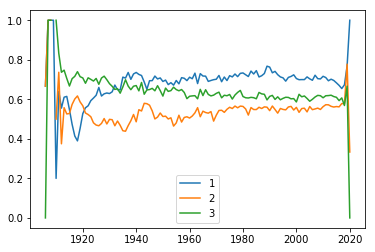

In [36]:
for n_val in range(1,4):
    plt.plot(uniqueYears, actorDF[n_val])

plt.legend()

![alt text](sample.png "sample output")